# Campo de gravidade sobre a bacia do Parnaiba

Este script é baseado na disciplina de metodos potenciais. Mostra o campo de gravidade predito pelo modelo global eigen 6c4 (Förste et al., 2014). Os coeficientes da expansão em hamônicos esféricos que descreve este modelo global podem ser baixados no site do IGCEM, na página Table of models.

Förste C., Bruinsma S.L., Abrikosov O., Lemoine J.-M., Schaller T., Götze H.-J., Ebbing J., Marty J.C., Flechtner F., Balmino G., Biancale R., 2014, EIGEN-6C4 The latest combined global gravity field model including GOCE data up to degree and order 2190 of GFZ Potsdam and GRGS Toulouse, 5th GOCE User Workshop, Paris, 25-28 November 2014, url: http://icgem.gfz-potsdam.de/ICGEM/documents/Foerste-et-al-EIGEN-6C4.pdf

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from mpl_toolkits.basemap import Basemap

In [2]:
import fatiando
from fatiando import gridder

In [3]:
import minhas_funcoes as mf

### Função para plotar os estados brasileiros

In [4]:
#def drawstates(ax, shapefile='BRA_adm_shp/BRA_adm0.shp'):
#        shp = m.readshapefile(shapefile, 'states', drawbounds=True)
#        for nshape, seg in enumerate(m.states):
#            poly = Polygon(seg, facecolor='0.75', edgecolor='k')
#            ax.add_patch(poly)

### Dados baixados no site do ICGEM 

In [5]:
#Topografia predita pelo modelo ETOPO1

longitude, latitude, topografia = np.loadtxt('etopo1_eigen-6c4-131243.gdf.txt', skiprows=29, unpack=True)

topo_positiva = (topografia > 0.)
topo_negativa = (topografia < 0.)

longitude_min = np.min(longitude)
longitude_max = np.max(longitude)

latitude_min = np.min(latitude)
latitude_max = np.max(latitude)

longitude_central = 0.5*(longitude_max + longitude_min)
latitude_central = 0.5*(latitude_max + latitude_min)

area = [longitude_min, longitude_max,
        latitude_min, latitude_max]

In [6]:
area

[310.0, 320.0, -12.0, -2.0]

#### Gravidade

In [7]:
gravidade = np.loadtxt('ga_eigen-6c4-131237.txt', skiprows=35, usecols=(2,3),
                      unpack=True)

#### Distúrbio de Gravidade

In [8]:
altitude_ortometrica, disturbio = np.loadtxt('gd_eigen-6c4-131240.gdf.txt', skiprows=35, usecols=(2,3), unpack=True)

### Parâmetros do datum geodésico WGS84

In [9]:
a, f, GM, omega = mf.WGS84()

### Gravidade normal

In [10]:
# Sobre a topografia

gamma = mf.gamma_closedform(a, f, GM, omega, latitude, altitude_ortometrica)

# Sobre o elipsoide WGS84

gamma0 = mf.gamma_closedform(a, f, GM, omega, latitude,np.zeros_like(altitude_ortometrica))

### Anomalias calculadas

Constante Gravitacional (ou Newtonian constant of gravitation) em $\frac{m^{3}}{kg \, s^{2}}$

In [11]:
G = 6.67408e-11

In [12]:
# Correção Ar-livre

ca = -0.3086*altitude_ortometrica

# Correção Bouguer

rho_cc = 2670. # densidade da crosta continental
rho_co = 2900. # densidade da crosta oceânica
rho_a = 1025. # densidade da água dos oceanos

cb_continente = np.zeros_like(topografia)
cb_continente[topo_positiva] = 2.*np.pi*G*1.0e5*rho_cc*topografia[topo_positiva]

cb_oceano = np.zeros_like(topografia)
cb_oceano[topo_negativa] = 2.*np.pi*G*1.0e5*(rho_co - rho_a)*topografia[topo_negativa]

cb = cb_continente + cb_oceano

#### Anomalia Ar-livre

In [13]:
ar_livre = gravidade - gamma0 - ca

#### Anomalia Bouguer

In [14]:
bouguer = gravidade - gamma0 - ca - cb

#### Distúrbio de gravidade

In [15]:
disturbio_calculado = gravidade - gamma

### Coordenadas x y da projeção cartográfica

A projeção foi calculada com o Basemap. Para os exemplos mostrados abaixo, a projeção escolhida foi a Transversa de Mercator.

In [16]:
m = Basemap(llcrnrlon=longitude_min,llcrnrlat=latitude_min,
            urcrnrlon=longitude_max,urcrnrlat=latitude_max,
            resolution='i',projection='tmerc',
            lon_0=longitude_central,lat_0=latitude_central)
x, y = m(longitude, latitude)

### Mapas

In [17]:
topografia_min, topografia_media, topografia_max, topografia_var = mf.estatistica(topografia, 'm')

     min.:     -2415.00000 m
    media:       249.61983 m
     max.:       833.00000 m
var. max.:      3248.00000 m


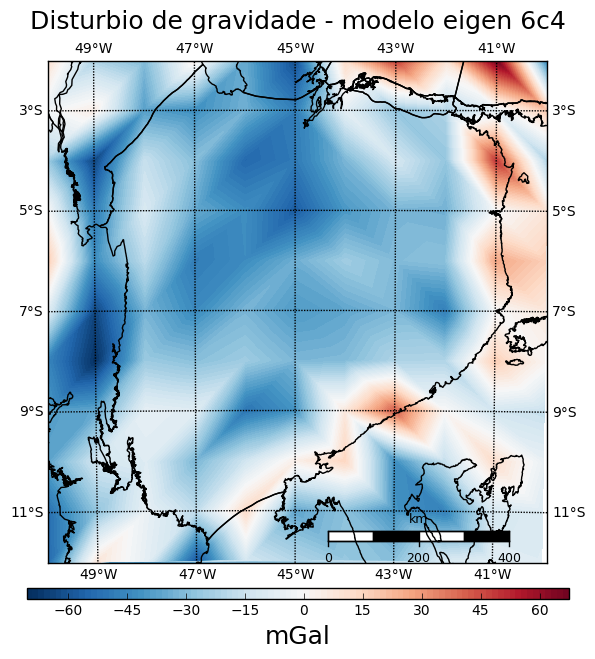

In [18]:
mf.plota_mapa(m, x, y, disturbio, area, 'mGal', 'Disturbio de gravidade - modelo eigen 6c4', 'RdBu_r',
              (10, 8), 2., bacia=True, escala=True, eixos=True)

In [19]:
disturbio_calc_min, disturbio_calc_medio, disturbio_calc_max, disturbio_calc_var = mf.estatistica(disturbio_calculado, 'mGal')

     min.:   -978242.82903 mGal
    media:   -977900.32349 mGal
     max.:   -977042.08978 mGal
var. max.:      1200.73926 mGal


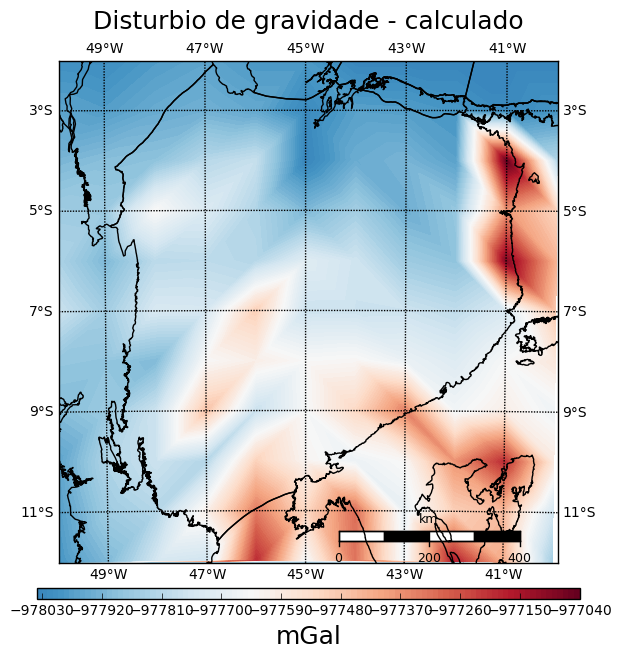

In [20]:
mf.plota_mapa(m, x, y, disturbio_calculado, area, 'mGal', 'Disturbio de gravidade - calculado', 'RdBu_r',
              (10, 8), 2., bacia=True, escala=True, eixos=True)

In [21]:
ar_livre_min, ar_livre_medio, ar_livre_max, ar_livre_var = mf.estatistica(ar_livre, 'mGal')

     min.:   -978242.85789 mGal
    media:   -977900.36288 mGal
     max.:   -977042.18388 mGal
var. max.:      1200.67401 mGal


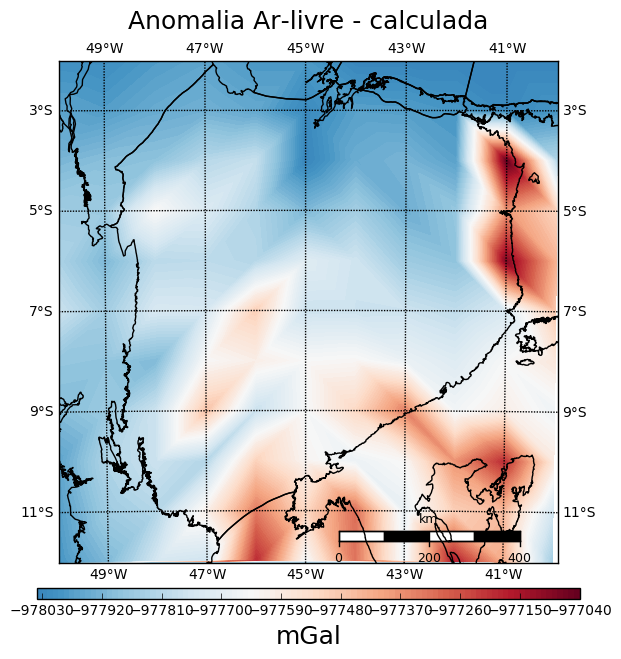

In [24]:
mf.plota_mapa(m, x, y, ar_livre, area, 'mGal', 'Anomalia Ar-livre - calculada', 'RdBu_r',
              (10, 8), 2., bacia=True, escala=True, eixos=True)

In [25]:
bouguer_min, bouguer_medio, bouguer_max, bouguer_var = mf.estatistica(bouguer, 'mGal')

     min.:   -978264.91501 mGal
    media:   -977929.51919 mGal
     max.:   -977129.06877 mGal
var. max.:      1135.84624 mGal


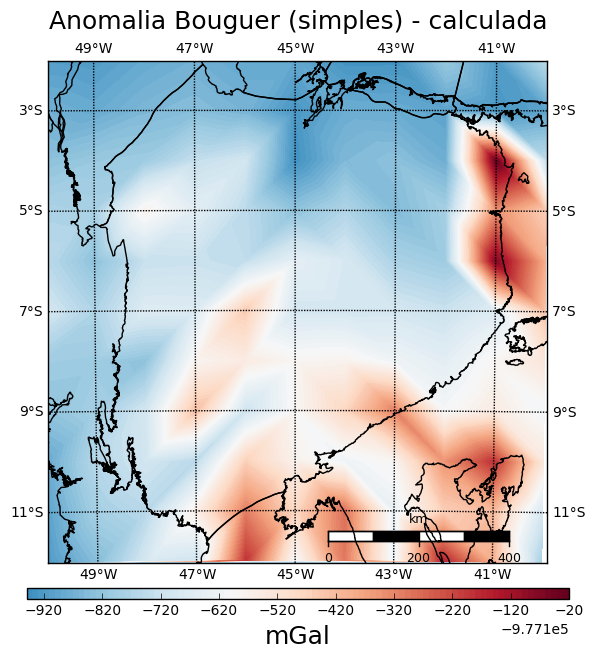

In [27]:
mf.plota_mapa(m, x, y, bouguer, area, 'mGal', 'Anomalia Bouguer (simples) - calculada', 'RdBu_r',
              (10, 8), 2., bacia=True, escala=True, eixos=True)